In [1]:
using Dolo,QuantEcon,Plots

filename="RBC_PS4.yaml"
model=yaml_import(filename)

name,RBC_PS4
filename,RBC_PS4.yaml
Type,Equation
transition,"\[z_{t} = \rho z_{t-1}+e_{z,t}\]"
,\[k_{t} = \left(1-\delta\right) k_{t-1}+i_{t-1}\]
felicity,\[u_{t} = \frac{\left(\left(c_{t}\right)^{\theta} \left(\left(1-n_{t}\right)\right)^{\left(1-\theta\right)}\right)^{\left(1-\gamma\right)}}{\left(1-\gamma\right)}\]
arbitrage,\[\left(\left(1-n_{t}\right)-\frac{\left(1-\theta\right) c_{t}}{\theta w_{t}}\right)\]
,\[\left(1-\beta \left(\frac{c_{t+1}}{c_{t}}\right)^{\left(\theta \left(1-\gamma\right)-1\right)} \left(\frac{\left(1-n_{t+1}\right)}{\left(1-n_{t}\right)}\right)^{\left(1-\theta\right) \left(1-\gamma\right)} \left(1-\delta\right)+rk_{t+1}\right)\]


In [2]:
k_ss=model.calibration[:states][2]
@time sol_global=time_iteration(model)
dr_global=sol_global.dr;

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     1.36e-02        9.29e-03        NaN             4.27e+00        4    
2     5.27e-03        8.53e-03        9.18e-01        3.18e-02        3    
3     4.86e-03        7.85e-03        9.20e-01        1.65e-02        3    
4     4.48e-03        7.22e-03        9.20e-01        1.97e-02        3    
5     4.13e-03        6.65e-03        9.20e-01        1.97e-02        3    
6     3.81e-03        6.11e-03        9.20e-01        1.87e-02        3    
7     3.51e-03        5.62e-03        9.20e-01        2.02e-02        3    
8     3.23e-03        5.17e-03        9.20e-01        1.90e-02        3    
9     2.98e-03        4.76e-03        9.20e-01        2.64e-02        3    
10    2.74e-03        4.37e-03        9.19e-01        1.66e-02        3    
11    2.52e-03        4

111   1.63e-06        2.43e-06        9.42e-01        1.51e-02        2    
112   1.53e-06        2.29e-06        9.41e-01        1.15e-02        2    
113   1.44e-06        2.15e-06        9.41e-01        1.19e-02        2    
114   1.36e-06        2.02e-06        9.40e-01        1.11e-02        2    
115   1.27e-06        1.90e-06        9.40e-01        1.54e-02        2    
116   1.20e-06        1.79e-06        9.39e-01        1.12e-02        2    
117   1.12e-06        1.68e-06        9.39e-01        1.12e-02        2    
118   1.05e-06        1.58e-06        9.38e-01        1.77e-02        2    
119   9.89e-07        1.48e-06        9.38e-01        2.25e-02        2    
120   9.27e-07        1.38e-06        9.37e-01        1.17e-02        2    
121   8.69e-07        1.30e-06        9.37e-01        2.34e-02        2    
122   8.13e-07        1.21e-06        9.36e-01        1.30e-02        2    
123   7.61e-07        1.14e-06        9.36e-01        1.14e-02        2    
124   7.12e-

In [7]:
set_calibration!(model,k=k_ss)
sim=simulate(model,dr_global,N=1,T=41)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, [1]
    :V, Symbol[:e_z, :z, :k, :n, :i, :w, :rk, :y, :c]
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
And data, a 1×9×41 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  29.289  0.291587  0.351417  3.7925  0.0251709  1.84307  1.49166

[:, :, 2] =
 -0.00920821  -0.00920821  29.2889  …  3.76734  0.0248449  1.8192  1.48564

[:, :, 3] =
 -0.010108  -0.0188558  29.271  …  3.74016  0.0245177  1.79414  1.4789

...

[:, :, 39] =
 0.00344699  0.0178623  30.1283  0.293671  …  0.0253017  1.90574  1.52693

[:, :, 40] =
 -0.0100313  0.00693791  30.1456  0.291438  …  0.0249039  1.87685  1.52009

[:, :, 41] =
 -0.000908105  0.00568291  30.1406  0.291193  …  0.0248626  1.87343  1.51912


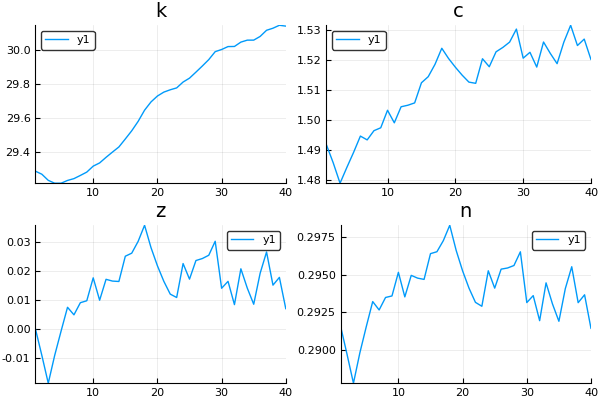

In [8]:
k_s=squeeze(sim[:,:k,2:end],1);
c_s=squeeze(sim[:,:c,1:end-1],1);
z_s=squeeze(sim[:,:z,1:end-1],1);
n_s=squeeze(sim[:,:n,1:end-1],1);

pyplot()
p1=plot(k_s,title="k")
p2=plot(c_s,title="c")
p3=plot(z_s,title="z")
p4=plot(n_s,title="n")
plot(p1,p2,p3,p4)

In [9]:
size=model.calibration[:parameters][end]
irf=response(model,dr_global,:e_z,size)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:e_z, :z, :k, :n, :i, :w, :rk, :y, :c]
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
And data, a 9×40 Array{Float64,2}:
  0.0         0.007       0.0         0.0        …   0.0          0.0       
  0.0         0.007       0.00665     0.0063175      0.00104923   0.00099677
 29.289      29.2889     29.3026     29.3153        29.43        29.4289    
  0.291587    0.292996    0.292901    0.292811       0.291541     0.291532  
  0.351417    0.365137    0.364317    0.363541       0.352094     0.352001  
  3.7925      3.81178     3.81165     3.81151    …   3.80402      3.80381   
  0.0251709   0.0254212   0.0254002   0.0253805      0.0251224    0.0251212 
  1.84307     1.8614      1.86073     1.86009        1.84838      1.84822   
  1.49166     1.49626     1.49641     1.49655        1.49629      1.49622   


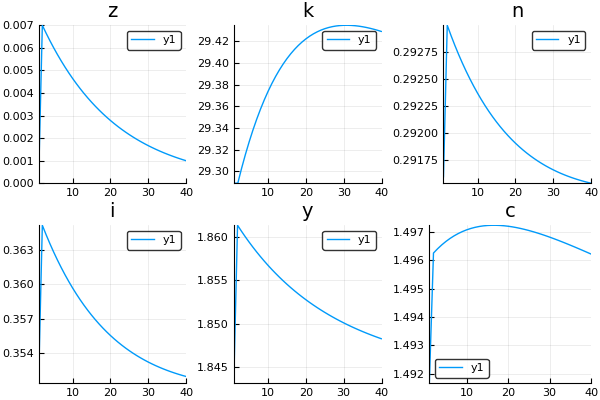

In [10]:
irf_z,irf_k,irf_n,irf_i,irf_y,irf_c=irf[:z,:], irf[:k,:], irf[:n,:], irf[:i,:], irf[:y,:], irf[:c,:];
p1=plot(irf_z,title="z")
p2=plot(irf_k,title="k")
p3=plot(irf_n,title="n")
p4=plot(irf_i,title="i")
p5=plot(irf_y,title="y")
p6=plot(irf_c,title="c")
plot(p1,p2,p3,p4,p5,p6)

In [11]:
size=model.calibration[:parameters][end]
set_calibration!(model,k=k_ss/2)
irf=response(model,dr_global,:e_z,0.0,T=40)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:e_z, :z, :k, :n, :i, :w, :rk, :y, :c]
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
And data, a 9×40 Array{Float64,2}:
  0.0         0.0         0.0        …   0.0         0.0         0.0      
  0.0         0.0         0.0            0.0         0.0         0.0      
 14.6445     14.9554     15.2597        22.6758     22.8166     22.9545   
  0.320374    0.319759    0.319156       0.30447     0.304192    0.303919 
  0.486607    0.483756    0.480965       0.412953    0.411661    0.410397 
  2.76795     2.79345     2.81817    …   3.36479     3.37437     3.38373  
  0.0403692   0.0398176   0.0392948      0.0301197   0.0299915   0.0298672
  1.47796     1.48872     1.49906        1.70747     1.71076     1.71396  
  0.991358    1.00496     1.0181         1.29451     1.2991      1.30357  


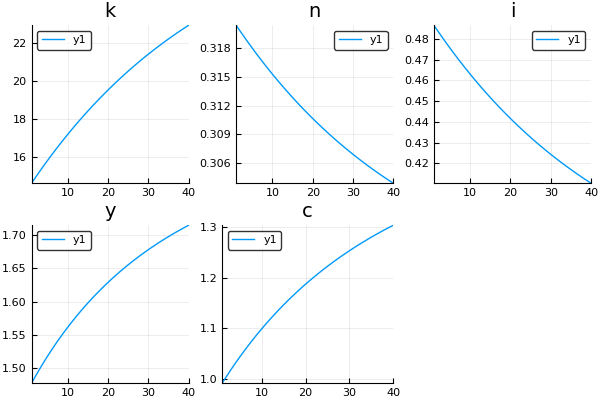

In [12]:
irf_z,irf_k,irf_n,irf_i,irf_y,irf_c=irf[:z,:], irf[:k,:], irf[:n,:], irf[:i,:], irf[:y,:], irf[:c,:];
p2=plot(irf_k,title="k")
p3=plot(irf_n,title="n")
p4=plot(irf_i,title="i")
p5=plot(irf_y,title="y")
p6=plot(irf_c,title="c")
plot(p2,p3,p4,p5,p6)